# 88-Inch Foil Activation Experiment to Measure ETA Neutron Spectrum

The source was 33 MeV deuteron break-up on Ta.

This notebook contains the code necessary to generate STAYSL inputs, a description on how to run STAYSL, and the anaysis and plotting of the resulting outputs.  

## BCF

The STASYL BCF input files are generated from the recoded beam current monitor files stores at:

In [1]:
from Support.Utilities import check_path

bcmPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm'
check_path(bcmPath)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/BCM/ETA_Trimmed.bcm


True

The file used is a modified version of the BCM created file where pre and post calibrations are removed from the file; only the actual irradiation measurements are included.

Support for generating the BCF input files can be found in the [PyScripts Repo](http://github.com/jamesbevins/PyScripts). 

In [2]:
from Unfolding.STAYSL import bcmToBCF

bcfPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/BCF/flux_history.dat'
bcmToBCF(bcmPath, bcfPath)

The total measurement time was 70418.0 seconds with an integrated measurement of 0.759992152.


The BCF file will be placed at the path indicated above.  The BCF code can be executed by double clicking on the BCF executable and typing in the BCF input file name.

## SHIELD

SHIELD requires a fine group cross section file.  For this, the [14468 group shield cross sections](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shld_xsect.out) were used.

NOTE: SHIELD is only valid/necessary for non-threshold reactions.

The course group structure is specified in the [shldengrp.dat](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldengrp.dat) file, but this is not required with STAYSL PNNL v 1.2.0.

The [input file](https://github.com/SlaybaughLab/88_Data/tree/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.dat) was generated using as measured quantities found in the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx).

SHIELD is ran by double clicking the SHIELD executable located in the same directory as the input files.

## SigPhi Calculator

The [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) was filled in with data from the [foil dimensions spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/BeamOnlyData/BeamFoilDimensions.xlsx), [BCF output](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/BCF/flux_history.out), and the [experimental analysis data](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/33MeV_ETA_Activation_Analysis.pdf).

** Note: the activities are in units of Bq/g and were adjusted as such from the calculated $A_0$ values **

The integral fluxes were calculated using a [STAYSL FIR Run](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/FIR).  Once the FIR run is created, the integral flux can be calculated from the code segment below and entered into the SigPhi Calculator.

In [3]:
from Unfolding.STAYSL import integralXSecEst

firPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/SigPhi_Calculator/FIR/'

integralXSecEst(firPath, numRx=6)

The epithermal/thermal ratio is: 171.509974734

AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137
AL27P
The > 0.1 flux weighted sigma is: 0.0219491979955
The > 1 flux weighted sigma is: 0.0219491979955
AL27A
The > 0.1 flux weighted sigma is: 0.0243749813843
The > 1 flux weighted sigma is: 0.0243749813843
NI582
The > 0.1 flux weighted sigma is: 0.00524730850596
The > 1 flux weighted sigma is: 0.00524730850596
IN115N
The > 0.1 flux weighted sigma is: 0.119558244971
The > 1 flux weighted sigma is: 0.112587699734
AU1972
The > 0.1 flux weighted sigma is: 0.386506230663
The > 1 flux weighted sigma is: 0.386506230663
AU197G
The > 0.1 flux weighted sigma is: 0.0676332206455
The > 1 flux weighted sigma is: 0.0192244375137


## STAYSL_PNNL

The STAYSL_PNNL input file was created from the [SigPhi Calculator](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SigPhi_Calculator/SigPhi_Calculator_1.2_CleanBeam.xlsm) and [MCNP simulation results]().

Default values for covariance data using Gaussian formalism were used.

The [SHIELD library input file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/sshldlib.dat) is an appropriately named copy of the [SHIELD ouput file](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/SHIELD/shldinput.out).

The flux normalization factor (TNORM) for the MCNP flux was calculated using the [Beam Calcs spreadsheet](https://github.com/SlaybaughLab/88_Data/blob/master/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/ETA_88_BeamCalcs.xlsx) and experimental data.

To get the flux and flux uncertainty data from the MCNP output into STAYSL format:

In [4]:
from GeneralNuclear.MCNP import read_tally
from Unfolding.STAYSL import stayslFlux

simPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt.o'
check_path(simPath)

(tallyFrame, tallyTot, uncertTot) = read_tally(simPath, 214, readGroups=True, splitTally=False)

stayslFlux(tallyFrame)

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Simulated/Activation/33MeVTa/ETA/Model/33MeVTaETA_Foil_tgt.o
The flux:
 1.5978e-11 6.9427e-10 2.8450e-09 6.7307e-09 5.4908e-09 4.7259e-09 2.7526e-09 
 2.4714e-09 3.0093e-09 1.5325e-09 1.8840e-09 2.0494e-09 1.5912e-09 1.6968e-09 
 2.1142e-09 1.6550e-09 1.8750e-09 1.7464e-09 1.8100e-09 1.8852e-09 2.1064e-09 
 2.5309e-09 2.5382e-09 2.3616e-09 1.2251e-09 1.5981e-09 1.5536e-09 2.3077e-09 
 2.3351e-09 2.2380e-09 3.3094e-09 2.1699e-09 3.8191e-09 3.3431e-09 3.8278e-09 
 6.3113e-09 5.8678e-09 8.6587e-09 8.4676e-09 1.4208e-08 1.5801e-08 3.1437e-08 
 2.8643e-08 3.7539e-08 6.9985e-08 9.8595e-08 8.1848e-08 1.6316e-07 2.0170e-07 
 3.8149e-07 3.1758e-07 4.6117e-07 3.9083e-07 5.0109e-07 4.7156e-07 5.5557e-07 
 5.9041e-07 4.7242e-07 6.5977e-07 6.4457e-07 7.3608e-07 7.6820e-07 7.5692e-07 
 7.7375e-07 8.9467e-07 9.1901e-07 9.5175e-07 8.7176e-07 1.1670e-06 1.0952e-06 
 2.2255e-06 1.8534e-06 1.6132e-06 1.3441e-06 1.1240e-06 1.3067e-06

The STAYSL code is ran by double clicking the executable or running from the command line. 

## Output Analysis

Read the data from the output file using pandas. Convert relative std to absolute.

In [7]:
import pandas as pd
from DataAnalysis.DataManipulation import bin_integration, bin_differentiation

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/stayslin.out'
df = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                   names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                          'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

df.apply(pd.to_numeric)

df['adjFlux'] = bin_integration(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low')
df['adjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['adjFlux'].tolist(), 'low', True)
df['unadjFlux'] = bin_integration(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low')
df['unadjLethargy'] =  bin_differentiation(df['lowE'].tolist(), df['unadjFlux'].tolist(), 'low', True)

df['adjLethargyStd'] = df['adjStd'] * df['adjLethargy'] / 100
df['unadjLethargyStd'] = df['unadjStd'] * df['adjLethargy'] / 100
df['adjStd'] = df['adjStd'] * df['adjFlux'] / 100
df['unadjStd'] = df['unadjStd'] * df['unadjFlux'] / 100

df

,lowE,adjFlux,unadjFlux,fluxRatio,adjStd,unadjStd,uncertRatio,integralFlux,intFluxUncert,adjLethargy,unadjLethargy,adjLethargyStd,unadjLethargyStd
1,1.000000e-10,0.399618,0.140202,2.850,0.193215,0.082313,0.824,337350.0000,0.56,0.173552,0.060889,0.083912,0.101892
2,1.000000e-09,9.863100,6.092100,1.619,1.380834,1.091704,0.781,337350.0000,0.56,4.283490,2.645765,0.599689,0.767601
3,1.000000e-08,35.753900,24.963900,1.432,3.049808,2.890820,0.737,337340.0000,0.56,42.926532,29.971937,3.661633,4.970892
4,2.300000e-08,75.297600,59.059800,1.275,3.621815,4.116468,0.691,337300.0000,0.56,96.966914,76.056163,4.664109,6.758594
5,5.000000e-08,66.263600,48.180600,1.375,3.869794,4.336254,0.648,337230.0000,0.56,158.256423,115.069049,9.242175,14.243078
6,7.600000e-08,57.969600,41.468700,1.398,3.269485,3.831708,0.610,337160.0000,0.56,139.955987,100.117869,7.893518,12.931933
7,1.150000e-07,34.749550,24.153800,1.439,2.022424,2.422626,0.580,337100.0000,0.56,88.903928,61.795554,5.174209,8.917064
8,1.700000e-07,31.849500,21.686050,1.469,1.914155,2.329082,0.560,337070.0000,0.56,78.550532,53.484380,4.720887,8.436327
9,2.550000e-07,43.798750,26.406250,1.659,3.714134,4.053359,0.553,337040.0000,0.56,109.796700,66.196390,9.310760,16.853793
10,3.800000e-07,21.321400,13.447510,1.586,1.684391,1.909546,0.556,336990.0000,0.56,57.664832,36.369488,4.555522,8.188406


Convert to Histograms.

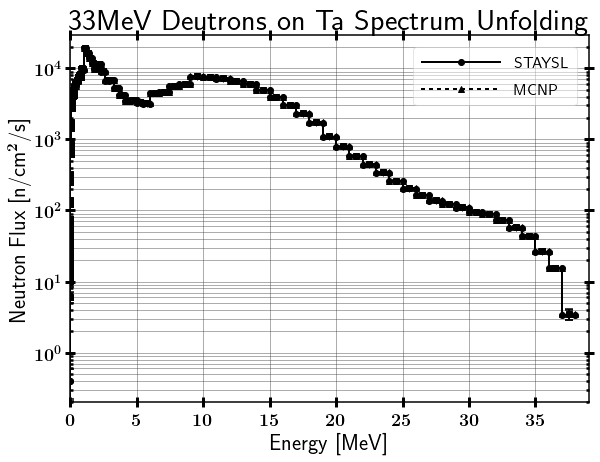

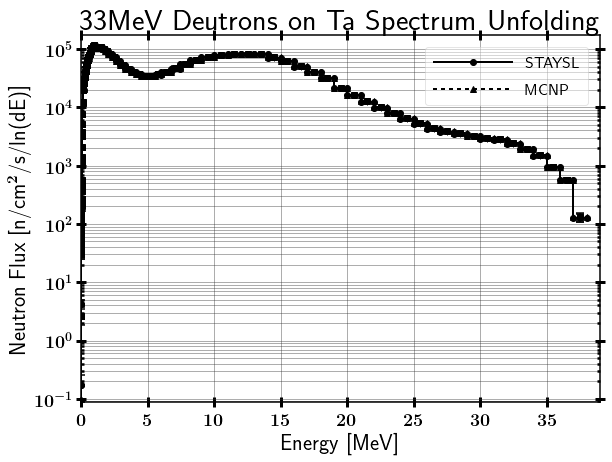

In [8]:
from DataAnalysis.Histograms import Histogram
import matplotlib
%matplotlib inline

outpath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/'

adjHisto = Histogram()
adjHisto.build_histo(df['lowE'].tolist(), df['adjFlux'].tolist(), uncert=df['adjStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjHisto = Histogram()
unadjHisto.build_histo(df['lowE'].tolist(), df['unadjFlux'].tolist(), uncert=df['unadjStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjHisto.plot(unadjHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold')

adjLethargyHisto = Histogram()
adjLethargyHisto.build_histo(df['lowE'].tolist(), df['adjLethargy'].tolist(), uncert=df['adjLethargyStd'].tolist(),
                     edgeLoc='low', name='STAYSL')

unadjLethargyHisto = Histogram()
unadjLethargyHisto.build_histo(df['lowE'].tolist(), df['unadjLethargy'].tolist(), uncert=df['unadjLethargyStd'].tolist(),
                     edgeLoc='low', name='MCNP')

adjLethargyHisto.plot(unadjLethargyHisto, xMin=1E-6, logX=False, logY=True,
                  title='33MeV Deutrons on Ta Spectrum Unfolding',
                  xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                  savePath=outpath+'33MeVTa_Staysl-Unfold_Lethargic')

#ratioHisto = Histogram()
#ratioHisto.build_histo(df['lowE'].tolist(), df['fluxRatio'].tolist(), edgeLoc='low')
#ratioHisto.plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP',
#              xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio')

Read in and store MCNP simulation results.

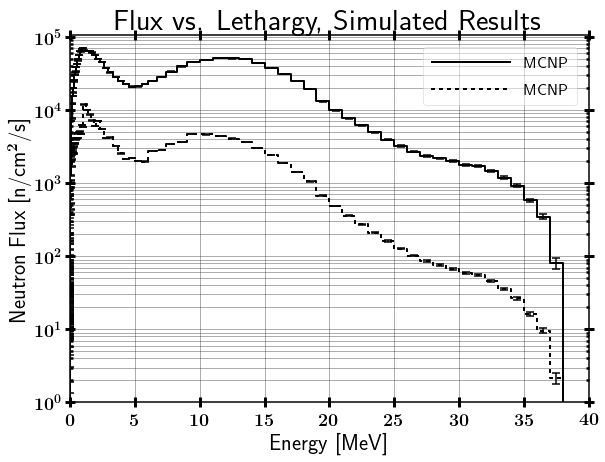

In [9]:
mcnpHisto = Histogram()
normFactor = 5.37E9
tallyFrame['normTally'] = tallyFrame['tally'] * normFactor
tallyFrame['normUncertainty'] = tallyFrame['uncertainty'] * tallyFrame['normTally']
mcnpHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 
                       uncert=tallyFrame['normUncertainty'].tolist(), edgeLoc='up', name='MCNP')

tallyFrame['normLethargy'] =  bin_differentiation(tallyFrame['bin'].tolist(), tallyFrame['normTally'].tolist(), 'up', True)
tallyFrame['normLethargyUncert'] = tallyFrame['uncertainty'] * tallyFrame['normLethargy']
mcnpLethargyHisto = Histogram()
mcnpLethargyHisto.build_histo(tallyFrame['bin'].tolist(), tallyFrame['normLethargy'].tolist(), 
                       uncert=tallyFrame['normLethargyUncert'].tolist(), edgeLoc='up', name='MCNP')
mcnpLethargyHisto.plot(mcnpHisto, xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
              title='Flux vs. Lethargy, Simulated Results',
              xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s]',
              savePath=outpath+'33MeVTa_MCNP')

Plot the normalized 33 MeV d Breakup source vs Modeled MCNP ETA results

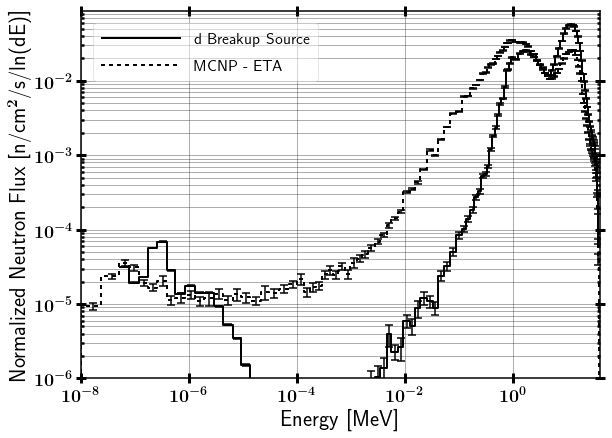

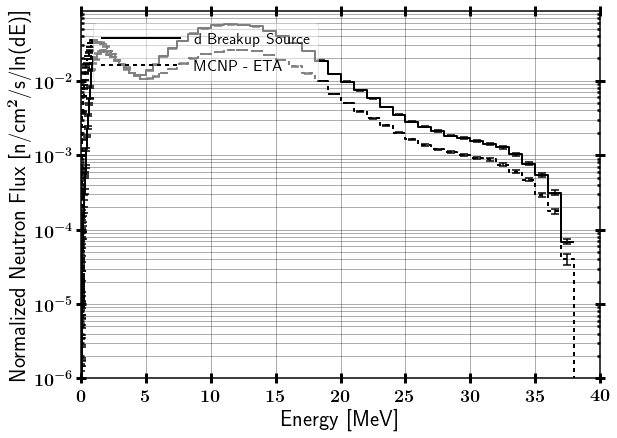

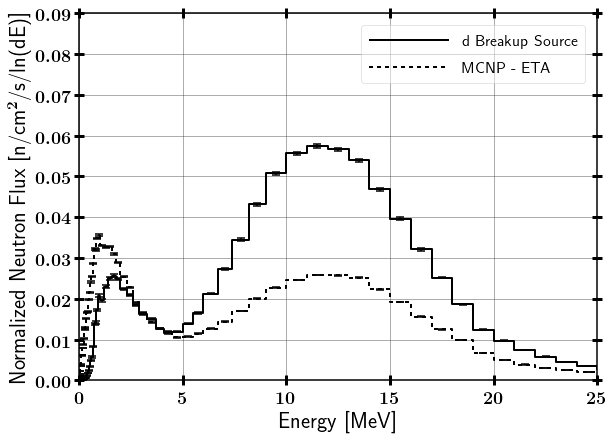

In [14]:
import numpy as np

path = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/CleanBeam/STAYSL_PNNL/Iteration3/stayslin.out'
beamDF = pd.read_table(path, engine='python', sep='\s+', skiprows=101, skipfooter=649, header=None,
                       names=['lowE', 'adjFlux', 'unadjFlux', 'fluxRatio', 'adjStd', 
                       'unadjStd', 'uncertRatio', 'integralFlux', 'intFluxUncert'])

beamDF.apply(pd.to_numeric)


beamDF['adjFlux'] = bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')
beamDF['normAdjFlux'] = beamDF['adjFlux'] / sum(beamDF['adjFlux'])
beamDF['adjLethargy'] =  bin_differentiation(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low', True)
beamDF['normAdjLethargy'] = beamDF['adjLethargy'] / sum(beamDF['adjLethargy'])

beamDF['adjLethargyStd'] = beamDF['adjStd'] * beamDF['adjLethargy'] / 100
beamDF['normAdjLethargyStd'] = beamDF['adjStd'] * beamDF['normAdjLethargy'] / 100
beamDF['normAdjStd'] = beamDF['adjStd'] * beamDF['normAdjFlux'] / 100
beamDF['adjStd'] = beamDF['adjStd'] * beamDF['adjFlux'] / 100

beamNormHisto = Histogram()
beamNormHisto.build_histo(beamDF['lowE'].tolist(), beamDF['normAdjLethargy'].tolist(), 
                          uncert=beamDF['normAdjLethargyStd'].tolist(), edgeLoc='low',
                          name='d Breakup Source')

mcnpETANormHisto = Histogram()
mcnpETANormHisto.build_histo(tallyFrame['bin'].tolist(), 
                             (tallyFrame['normLethargy']* (1.0 / sum(tallyFrame['normLethargy']))).tolist(), 
                             uncert=(tallyFrame['uncertainty']*tallyFrame['normLethargy']*(1.0/sum(tallyFrame['normLethargy']))).tolist(),
                             edgeLoc='up', name='MCNP - ETA')

beamNormHisto.plot(mcnpETANormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, legendLoc=2,
                   includeMarkers=False, title='',
                   xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                   savePath=outpath+'33MeVTa_MCNP_NormComp_log')

beamNormHisto.plot(mcnpETANormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=False, logY=True, legendLoc=2,
                   includeMarkers=False, title='',
                   xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                   savePath=outpath+'33MeVTa_MCNP_NormComp_semilog')

beamNormHisto.plot(mcnpETANormHisto, xMin=0, xMax=25, yMax=0.09, logX=False, logY=False, legendLoc=1,
                   includeMarkers=False, title='',
                   xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                   savePath=outpath+'33MeVTa_MCNP_NormComp_lin')

Plot the Absolute 33 MeV d Breakup source vs Modeled MCNP ETA results

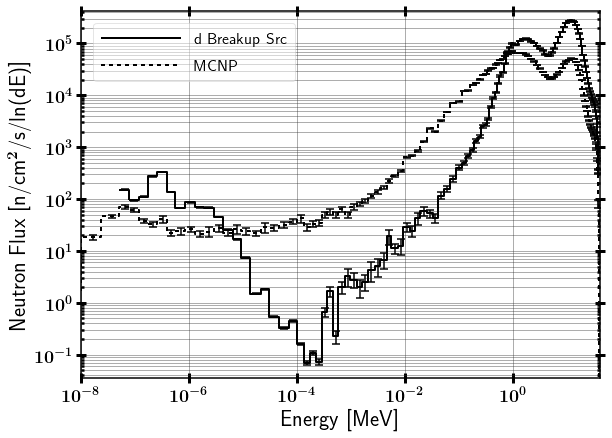

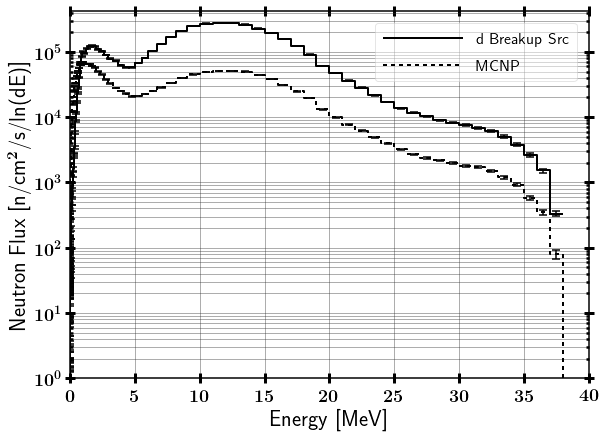

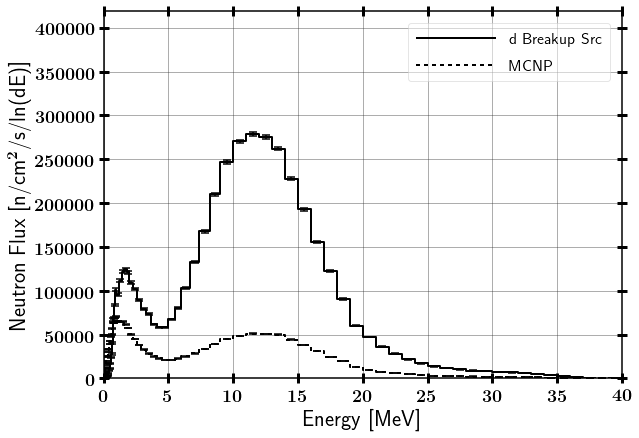

In [20]:
beamHisto = Histogram()
beamHisto.build_histo(beamDF['lowE'].tolist(), beamDF['adjLethargy'].tolist(), 
                          uncert=beamDF['adjLethargyStd'].tolist(), edgeLoc='low',
                          name='d Breakup Src')

beamHisto.plot(mcnpLethargyHisto, xMin=1E-8, xMax=40, logX=True, logY=True, legendLoc=2,
               includeMarkers=False, title='',
               xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
               savePath=outpath+'33MeVTa_MCNP_Comp_log')

beamHisto.plot(mcnpLethargyHisto, xMin=1E-3, xMax=40, yMin=1, logX=False, logY=True,
               includeMarkers=False, title='',
               xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
               savePath=outpath+'33MeVTa_MCNP_Comp_semilog')

beamHisto.plot(mcnpLethargyHisto, xMin=0, xMax=40, logX=False, logY=False,
               includeMarkers=False, title='',
               xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
               savePath=outpath+'33MeVTa_MCNP_Comp_lin')

### Iterative Solution #1:

  - No modifications are made to the MCNP results for the guess spectrum
  - It does update the uncertainty throughout the convergence process. 

In [21]:
from Unfolding.STAYSL import IterativeSTAYSL

stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/'

# Build Data Structure Lists
iterSoln = []
iterAdjHisto = []
iterRatioHisto = []

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=.0025))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/
$\chi^2$ Convergence: 0.0025
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration1/stayslin.out
Chi^2 = 1.14806, Std Norm = 0.392767233868
Chi^2 = 1.14562
Std Norm = 0.392818418611, 0.392796906811


Beam Flux = 2.780660e+05
MCNP ETA Flux = 2.077682e+05
STAYSL ETA Flux = 3.783438e+05
Sim to Experimental Chi^2 = 4247.06600493


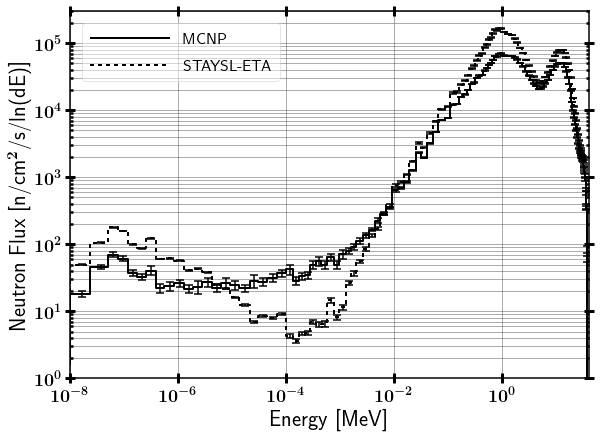

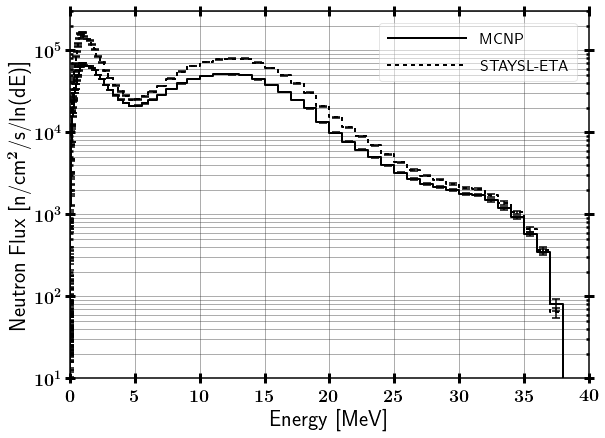

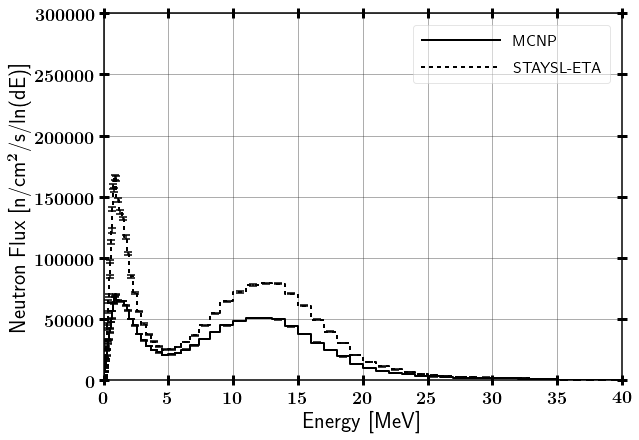

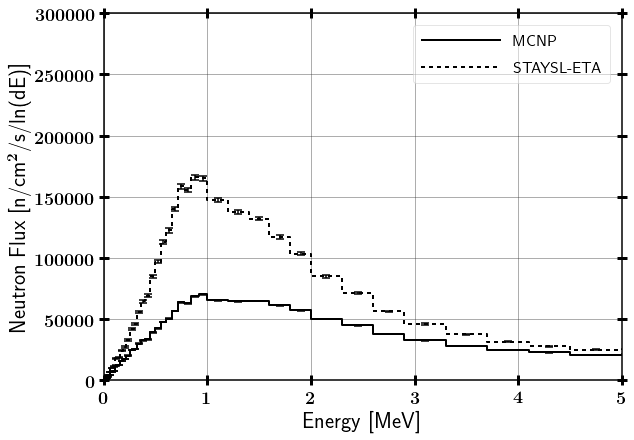

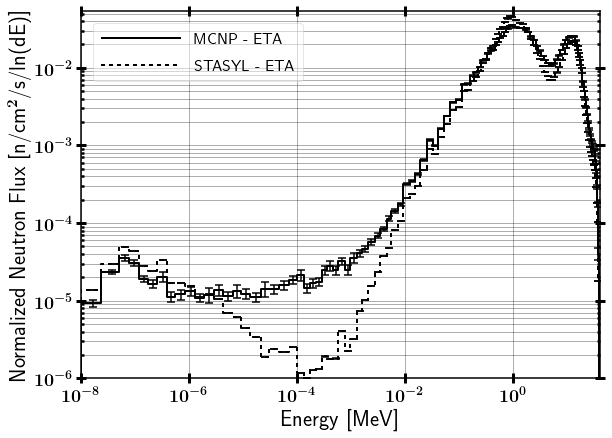

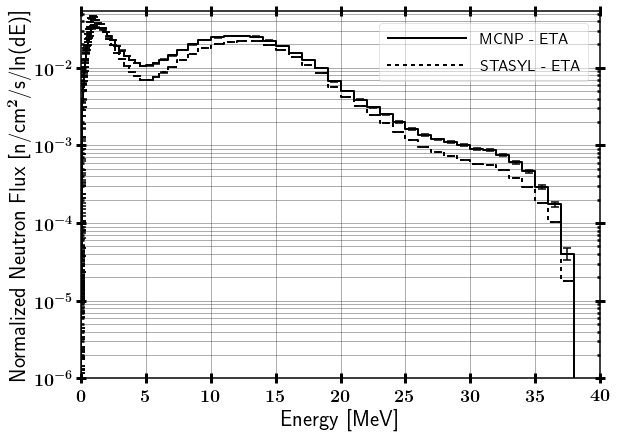

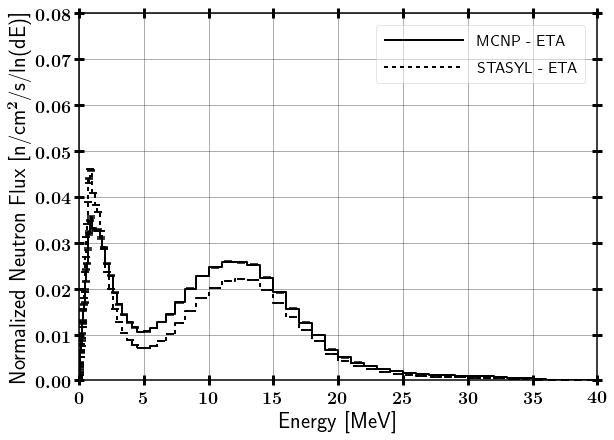

Sim to Experimental Chi^2 for Normalized Specta = 41976496.1755


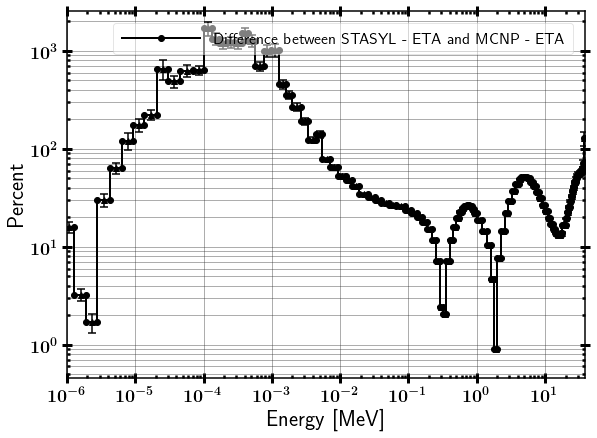

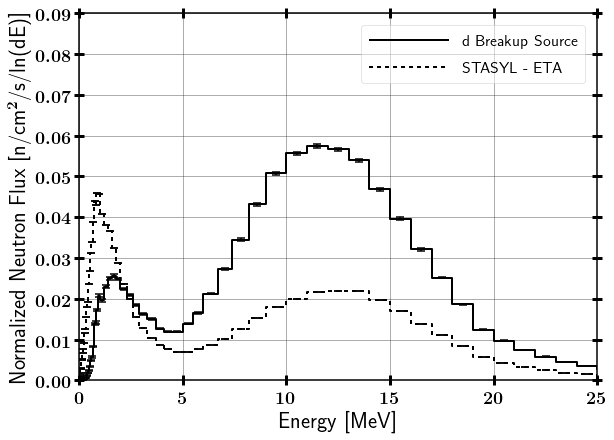

In [26]:
from DataAnalysis.Stats import red_chisq

iter = 0
iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjLethargy'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                             edgeLoc='low', name='STAYSL-ETA')

print "Beam Flux = {:2e}".format(sum(bin_integration(beamDF['lowE'].tolist(), beamDF['adjFlux'].tolist(), 'low')))
print "MCNP ETA Flux = {:2e}".format(sum(tallyFrame['normTally']))
print "STAYSL ETA Flux = {:2e}".format(sum(iterSoln[iter]._df['adjFlux']))

print "Sim to Experimental Chi^2 = {}".format(red_chisq(iterAdjHisto[iter].midPtData, 
                                                         mcnpHisto.midPtData[:len(iterAdjHisto[iter].midPtData)], 
                                                         standDev=iterAdjHisto[iter].sigma , freeParams=2))

# Plot comparison of MCNP simulation for ETA to STAYSL ETA unfold
mcnpLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-8, xMax=40, yMin=1, yMax=3E5, logX=True, logY=True, includeMarkers=False,
                       title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]', legendLoc=2,
                       savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_log')
mcnpLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=10, yMax=3E5, logX=False, logY=True, includeMarkers=False,
                       title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                       savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_semilog')
mcnpLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, yMax=3E5, logX=False, logY=False, includeMarkers=False,
                       title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]',
                       savePath=outpath+'33MeVTa_ETA_Comp-Sim-Exp_lin')
mcnpLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=5, yMin=1, yMax=3E5, logX=False, logY=False, includeMarkers=False,
                       title='', xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]')

# Plot normalized comparison of MCNP simulation for ETA to STAYSL ETA unfold
etaNormHisto = Histogram()
iterSoln[iter]._df['normAdjLethargy'] = iterSoln[iter]._df['adjLethargy'] / sum(iterSoln[iter]._df['adjLethargy'])
iterSoln[iter]._df['normAdjLethargyStd'] = iterSoln[iter]._df['adjStd'] * iterSoln[iter]._df['normAdjLethargy'] / 100
etaNormHisto.build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['normAdjLethargy'].tolist(), 
                              uncert=iterSoln[iter]._df['normAdjLethargyStd'].tolist(), edgeLoc='low',
                              name='STASYL - ETA')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-8, xMax=40, yMin=1E-6, logX=True, logY=True, includeMarkers=False,
                      title='', xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]', legendLoc=2,
                      savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_log')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, yMin=1E-6, logX=False, logY=True, includeMarkers=False,
                      title='', xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                      savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_semilog')
mcnpETANormHisto.plot(etaNormHisto, xMin=1E-6, xMax=40, yMax=0.08, logX=False, logY=False, includeMarkers=False,
                      title='', xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                      savePath=outpath+'33MeVTa_ETA_NormComp-Sim-Exp_lin')

print "Sim to Experimental Chi^2 for Normalized Specta = {}".format(red_chisq(etaNormHisto.midPtData, 
                                                         mcnpETANormHisto.midPtData[:len(etaNormHisto.midPtData)], 
                                                         standDev=etaNormHisto.sigma , freeParams=2))

# Relative difference between the sim and experimental result.
diffNormHisto = etaNormHisto.relDiff(mcnpETANormHisto)
diffNormHisto.plot(xMin=1E-6, logX=True, logY=True, xLabel='Energy [MeV]', yLabel='Percent')

# Pre and post ETA Exp comp
beamNormHisto.plot(etaNormHisto, xMin=0, xMax=25, yMax=0.09, logX=False, logY=False, legendLoc=1,
                   includeMarkers=False, title='',
                   xLabel='Energy [MeV]', yLabel='Normalized Neutron Flux [n/cm$^2$/s/ln(dE)]',
                   savePath=outpath+'33MeVTa_MCNP_NormComp-Exp_lin')

#iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
#iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio',
#              savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))

### Iterative Solution #2:

  - A uniform spectrum of 5E-7 with 100% uncertainty is used.
  - It does update the uncertainty throughout the convergence process. 

In [27]:
stayslPath = 'C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/'

iterSoln.append(IterativeSTAYSL(stayslPath, updateStd=True, chiConv=0.002))
print iterSoln[-1]

iterSoln[-1].run()

# Convert to lethargy
iterSoln[-1]._df['adjLethargy'] =  bin_differentiation(iterSoln[-1]._df['lowE'].tolist(),
                                                     iterSoln[-1]._df['adjFlux'].tolist(), 'low', True)

# Add to plot lists
iterAdjHisto.append(Histogram())
iterRatioHisto.append(Histogram())

IterativeSTYASL:
STAYSL Path: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/
$\chi^2$ Convergence: 0.002
Flux Std  Convergence: 0.1
Update Flux Std Each Iteration: True
Number of Energy Groups: 140

The file exists at: C:/Users/James/Dropbox/UCB/Research/ETAs/88Inch/Data/Experiments/Activation/33MeVTa_25Apr/Unfold/ETA/STAYSL_PNNL/Iteration2/stayslin.out
Chi^2 = 2.58385, Std Norm = 4.06460344191
Chi^2 = 2.58178
Chi^2 = 2.57969
Chi^2 = 2.57767
Chi^2 = 2.57563
Chi^2 = 2.57349
Chi^2 = 2.57142
Chi^2 = 2.56939
Chi^2 = 2.56735
Chi^2 = 2.56532
Chi^2 = 2.56321
Chi^2 = 2.56116
Chi^2 = 2.55914
Chi^2 = 2.55706
Chi^2 = 2.55508
Std Norm = 4.05527140892, 4.05586620958


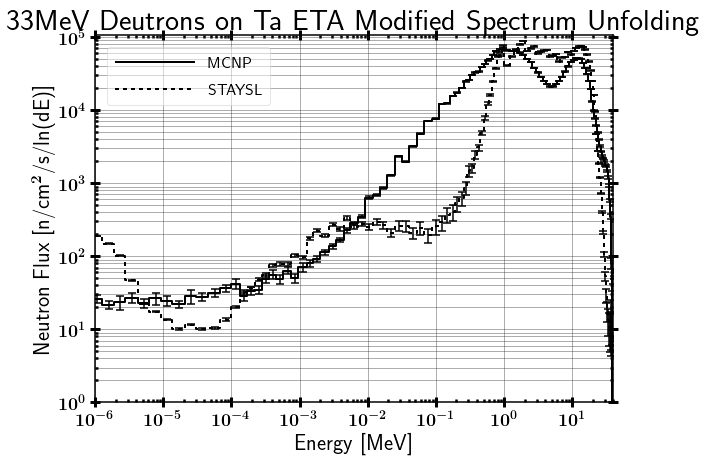

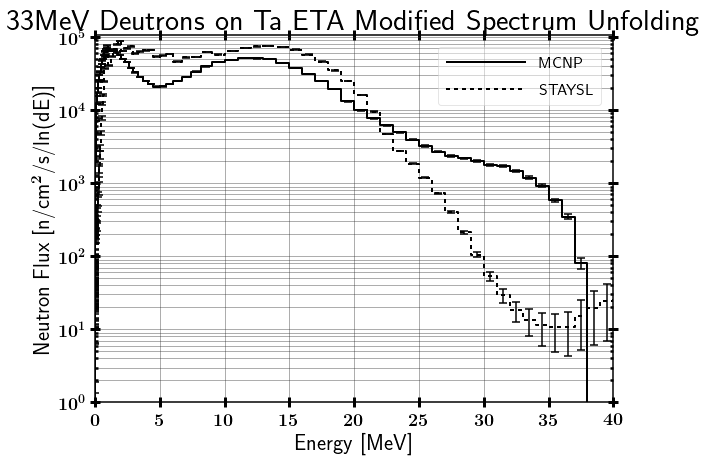

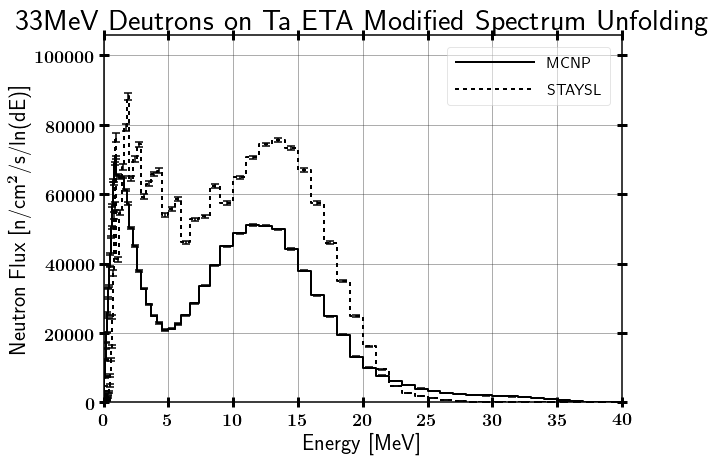

In [29]:
iter = 1

iterAdjHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(),iterSoln[iter]._df['adjLethargy'].tolist(),
                             uncert=(iterSoln[iter]._df['adjStd']*iterSoln[iter]._df['adjLethargy']).tolist(),
                             edgeLoc='low', name='STAYSL')

mcnpLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, logX=True, logY=True, includeMarkers=False,
                       title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
                       xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]', legendLoc=2)
mcnpLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, logX=False, logY=True, includeMarkers=False,
                       title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
                       xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]')
mcnpLethargyHisto.plot(iterAdjHisto[iter], xMin=1E-6, xMax=40, yMin=1, logX=False, logY=False, includeMarkers=False,
                       title='33MeV Deutrons on Ta ETA Modified Spectrum Unfolding',
                       xLabel='Energy [MeV]', yLabel='Neutron Flux [n/cm$^2$/s/ln(dE)]')

#iterRatioHisto[iter].build_histo(iterSoln[iter]._df['lowE'].tolist(), iterSoln[iter]._df['fluxRatio'].tolist(), edgeLoc='low')
#iterRatioHisto[iter].plot(xMin=1E-6, xMax=40, logX=False, logY=False, includeMarkers=False,
#              title='Ratio between STAYSL and MCNP', xLabel='Energy [MeV]', yLabel='Ratio')
#              #savePath=outpath+'33MeVTa_Staysl-MCNP-Ratio_Itr{:1d}'.format(iter))